In [1]:
#Dependencies and Setup
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import scipy.stats as st
warnings.filterwarnings('ignore')

#File to Load (Remember to Change These)
file_to_load = "Resources\IRS_Data_2015_CSV.csv"
file_to_load_2 = "Resources\MplsZipcodes.csv"
file_to_load_3 = "burg_dwell_df.csv"
file_load_4="tfmv_df.csv"
file_load_5= "theft_df.csv"
#Read Purchasing File and store into Pandas data frame
IRS_data = pd.read_csv(file_to_load)
Zip_data = pd.read_csv(file_to_load_2)
burg_dwell_data=pd.read_csv(file_to_load_3)
theft_mv_data = pd.read_csv(file_load_4)
theft_data= pd.read_csv(file_load_5)

IRS_data.head(50)

,Zip codes,Size of adjusted gross income,-1,-2,-3,-4,-5,-6,-7,-8,...,-118,-119,-120,-121,-122,-123,-124,-125,-126,-127
0,0.0,Total,"2,693,930","1,335,310","1,055,030","266,230","1,452,930","5,088,680","1,562,450","84,330",...,"2,132,040","27,544,650","61,560","119,492","66,990","246,961","590,790","2,983,904","1,958,710","5,037,427"
1,0.0,"$1 under $25,000",870560,673460,84230,102350,400710,995340,257720,61820,...,409110,342401,0,0,0,0,83940,67285,703090,1118699
2,0.0,"$25,000 under $50,000",631080,378530,139450,103700,325420,1099740,335330,18480,...,549090,1554370,0,0,0,0,107030,158749,513620,1149386
3,0.0,"$50,000 under $75,000",394500,171680,180080,36220,228560,808260,234250,3460,...,380430,2206319,0,0,0,0,101740,225534,284660,696251
4,0.0,"$75,000 under $100,000",276880,61580,199010,12740,167780,684950,208630,570,...,274000,2390000,0,0,0,0,79170,221480,188780,546841
5,0.0,"$100,000 under $200,000",395910,41200,341190,9740,239160,1122170,385290,**,...,394470,6969347,810,250,0,0,155060,756478,225140,847208
6,0.0,"$200,000 or more",125000,8860,111070,1480,91300,378220,141230,**,...,124940,14082213,60750,119242,66990,246961,63850,1554378,43420,679042
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,55001.0,NaN,"1,500",640,790,60,920,"2,830",730,0,...,"1,300","38,250",120,238,160,352,470,"5,931",910,"2,750"
9,55001.0,"$1 under $25,000",350,310,30,30,160,250,30,0,...,180,134,0,0,0,0,50,39,250,207


In [2]:
IRS_data = pd.read_csv('Resources\IRS_Data_2015_CSV.csv' , usecols = ['Zip codes','-1','-17'])

In [3]:
IRS_data = IRS_data.dropna()

In [4]:
IRS_data_fliterd = IRS_data.drop_duplicates('Zip codes')


In [5]:
IRS_data_cleaned = IRS_data_fliterd.rename (columns={"-1":"Number of returns","-17":"Total income amount in 000s"})
IRS_data_cleaned["Zip codes"] = (IRS_data_cleaned["Zip codes"]).astype(int)
IRS_data_cleaned

,Zip codes,Number of returns,Total income amount in 000s
0,0,"2,693,930","197,640,788"
8,55001,"1,500","212,720"
16,55003,"1,200","99,328"
24,55005,"2,230","151,314"
32,55006,"1,730","82,388"
...,...,...,...
6296,56760,180,"8,446"
6304,56761,220,"10,216"
6312,56762,"1,230","81,477"
6320,56763,"2,480","205,716"


In [6]:
Zip_data.head()

,Zip codes,Lat,Long
0,55401,44.984577,-93.269097
1,55402,44.976039,-93.271444
2,55403,44.970570,-93.284044
3,55404,44.961996,-93.261208
4,55405,44.972669,-93.301675


In [7]:
combined_zip_codes = pd.merge(Zip_data, IRS_data_cleaned, on="Zip codes")
combined_zip_codes

,Zip codes,Lat,Long,Number of returns,Total income amount in 000s
0,55401,44.984577,-93.269097,"6,560","951,609"
1,55402,44.976039,-93.271444,860,"565,582"
2,55403,44.970570,-93.284044,"9,970","1,006,822"
3,55404,44.961996,-93.261208,"12,310","467,957"
4,55405,44.972669,-93.301675,"8,650","994,104"
5,55406,44.938689,-93.221042,"18,550","1,158,199"
6,55407,44.935036,-93.253029,"18,890","868,889"
7,55408,44.940425,-93.292639,"18,840","1,076,675"
8,55409,44.930326,-93.281477,"6,380","472,111"
9,55410,44.911823,-93.319643,"10,360","1,458,333"


In [8]:
combined_zip_code_df= combined_zip_codes.rename(columns={"Zip codes": "Zip Code"})
combined_zip_code_df

,Zip Code,Lat,Long,Number of returns,Total income amount in 000s
0,55401,44.984577,-93.269097,"6,560","951,609"
1,55402,44.976039,-93.271444,860,"565,582"
2,55403,44.970570,-93.284044,"9,970","1,006,822"
3,55404,44.961996,-93.261208,"12,310","467,957"
4,55405,44.972669,-93.301675,"8,650","994,104"
5,55406,44.938689,-93.221042,"18,550","1,158,199"
6,55407,44.935036,-93.253029,"18,890","868,889"
7,55408,44.940425,-93.292639,"18,840","1,076,675"
8,55409,44.930326,-93.281477,"6,380","472,111"
9,55410,44.911823,-93.319643,"10,360","1,458,333"


In [9]:
burg_dwell_data

,Unnamed: 0,FID,PublicAddress,ControlNbr,CCN,Precinct,ReportedDate,BeginDate,Time,Offense,...,EnteredDate,GBSID,Lat,Long,X,Y,Neighborhood,LastChanged,LastUpdateDate,Zip Code
0,3,4,0032XX Lyndale AV N,3363220,MP 2014 457244,4,1/1/2015 1:24,12/31/2014 17:00,17:00:00,BURGD,...,1/1/2015 1:24,11106.0,45.014000,-93.288020,-10384774.91,5623725.697,MCKINLEY,1/5/2015 7:04,3/3/2017 13:40,55412
1,4,5,0055XX 11 AV S,3363223,MP 2015 000138,3,1/1/2015 1:40,12/31/2014 15:59,16:00:00,BURGD,...,1/1/2015 1:29,14453.0,44.902511,-93.258904,-10381533.74,5606186.876,DIAMOND LAKE,3/7/2015 14:29,3/3/2017 13:40,55417
2,12,13,0031XX Harriet AV S,3363278,MP 2015 000423,5,1/1/2015 7:05,1/1/2015 4:30,4:30:00,BURGD,...,1/1/2015 7:05,21894.0,44.945670,-93.285571,-10384502.23,5612972.426,LYNDALE,1/5/2015 1:50,3/3/2017 13:40,55408
3,20,21,0050XX Emerson AV N,3363332,MP 2015 000671,4,1/1/2015 13:34,1/1/2015 11:54,11:54:00,BURGD,...,1/1/2015 13:34,17326.0,45.046603,-93.295341,-10385589.90,5628861.164,LIND - BOHANON,1/1/2015 14:42,3/3/2017 13:40,55430
4,24,25,0052XX Washburn AV N,3363348,MP 2015 000738,4,1/1/2015 16:05,12/29/2014 18:30,18:30:00,BURGD,...,1/1/2015 15:43,17329.0,45.050334,-93.318225,-10388137.32,5629449.085,SHINGLE CREEK,1/8/2015 10:44,3/3/2017 13:40,55430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,19911,19912,0024XX Grand ST NE,3494148,MP 2015 469183,2,12/30/2015 12:43,12/29/2015 17:00,17:00:00,BURGD,...,12/30/2015 12:42,13649.0,45.012116,-93.270105,-10382780.64,5623429.110,BOTTINEAU,12/31/2015 15:07,3/3/2017 13:40,55418
2891,19925,19926,0005XX 1 ST N,3494254,MP 2015 469518,1,12/30/2015 18:30,12/30/2015 17:29,17:30:00,BURGD,...,12/30/2015 18:30,19562.0,44.988556,-93.273538,-10383162.75,5619720.006,NORTH LOOP,12/31/2015 14:54,3/3/2017 13:40,55401
2892,19926,19927,0009XX 20 AV SE,3494258,MP 2015 469506,2,12/30/2015 18:45,12/30/2015 12:30,12:30:00,BURGD,...,12/30/2015 18:44,21567.0,44.986950,-93.224210,-10377671.60,5619467.245,COMO,12/31/2015 15:21,3/3/2017 13:40,55414
2893,19972,19973,0010XX 15 AV SE,3494553,MP 2015 470403,2,12/31/2015 17:00,12/23/2015 12:00,12:00:00,BURGD,...,12/31/2015 16:48,16937.0,44.988723,-93.230763,-10378401.04,5619746.265,COMO,1/4/2016 6:45,3/3/2017 13:40,55414


In [10]:
burg_dwell_groupby_df = burg_dwell_data.groupby(["Zip Code"]).count()["Offense"]

burg_dwell_groupby_df

Zip Code
1344               1
55401             10
55402              1
55403             83
55404            142
55405             94
55406            322
55407            356
55408            194
55409             90
55410             79
55411            316
55412            312
55413             99
55414            206
55415              3
55416             17
55417            147
55418            150
55419            156
55421              4
55423              1
55430             68
55454             14
55479              1
United States      5
Name: Offense, dtype: int64

In [11]:
burg_dwell_groupby_df = burg_dwell_groupby_df.drop(["1344","United States"])
burg_dwell_groupby_df

Zip Code
55401     10
55402      1
55403     83
55404    142
55405     94
55406    322
55407    356
55408    194
55409     90
55410     79
55411    316
55412    312
55413     99
55414    206
55415      3
55416     17
55417    147
55418    150
55419    156
55421      4
55423      1
55430     68
55454     14
55479      1
Name: Offense, dtype: int64

In [12]:

burg_dwell_groupby_df=burg_dwell_groupby_df.reset_index()
burg_dwell_groupby_df

,Zip Code,Offense
0,55401,10
1,55402,1
2,55403,83
3,55404,142
4,55405,94
5,55406,322
6,55407,356
7,55408,194
8,55409,90
9,55410,79


In [13]:
burg_dwell_groupby_df.rename(columns={"Offense":"Number of Incidents"}, inplace=True)

In [14]:
burg_dwell_groupby_df["Zip Code"] = (burg_dwell_groupby_df["Zip Code"]).astype(int)

In [15]:
 final_merged_df= pd.merge(combined_zip_code_df, burg_dwell_groupby_df, on="Zip Code")
 final_merged_df
 

,Zip Code,Lat,Long,Number of returns,Total income amount in 000s,Number of Incidents
0,55401,44.984577,-93.269097,"6,560","951,609",10
1,55402,44.976039,-93.271444,860,"565,582",1
2,55403,44.970570,-93.284044,"9,970","1,006,822",83
3,55404,44.961996,-93.261208,"12,310","467,957",142
4,55405,44.972669,-93.301675,"8,650","994,104",94
5,55406,44.938689,-93.221042,"18,550","1,158,199",322
6,55407,44.935036,-93.253029,"18,890","868,889",356
7,55408,44.940425,-93.292639,"18,840","1,076,675",194
8,55409,44.930326,-93.281477,"6,380","472,111",90
9,55410,44.911823,-93.319643,"10,360","1,458,333",79


In [16]:
theft_mv_data

,Unnamed: 0,FID,PublicAddress,ControlNbr,CCN,Precinct,ReportedDate,BeginDate,Time,Offense,...,EnteredDate,GBSID,Lat,Long,X,Y,Neighborhood,LastChanged,LastUpdateDate,Zip Code
0,23,24,0036XX Oakland AV S,3363339,MP 2015 000664,3,1/1/2015 14:22,1/1/2015 1:30,1:30:00,TFMV,...,1/1/2015 14:22,12374.0,44.936867,-93.266317,-10382358.95,5611587.942,CENTRAL,1/2/2015 6:34,3/3/2017 13:40,55407
1,43,44,00002X Oliver AV S,3363458,MP 2015 999988,4,1/2/2015 8:36,12/12/2014 0:00,0:00:00,TFMV,...,1/2/2015 8:36,17698.0,44.976080,-93.307065,-10386894.94,5617756.612,BRYN - MAWR,1/3/2015 8:02,3/3/2017 13:40,55405
2,44,45,00002X Oliver AV S,3363459,MP 2015 999987,4,1/2/2015 8:53,12/4/2014 0:00,0:00:00,TFMV,...,1/2/2015 8:53,17698.0,44.976080,-93.307065,-10386894.94,5617756.612,BRYN - MAWR,1/3/2015 8:02,3/3/2017 13:40,55405
3,45,46,00002X Oliver AV S,3363462,MP 2015 999986,4,1/2/2015 9:04,7/10/2014 0:00,0:00:00,TFMV,...,1/2/2015 9:04,17698.0,44.976080,-93.307065,-10386894.94,5617756.612,BRYN - MAWR,1/3/2015 8:01,3/3/2017 13:40,55405
4,57,58,0027XX 15 AV S,3363517,MP 2015 999978,3,1/2/2015 12:58,12/26/2014 17:00,17:00:00,TFMV,...,1/2/2015 12:58,16879.0,44.952842,-93.253736,-10380958.42,5614100.434,MIDTOWN PHILLIPS,1/7/2015 12:02,3/3/2017 13:40,55407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2721,19945,19946,0032XX Logan AV N,3494356,MP 2015 993374,4,12/31/2015 8:42,12/31/2015 4:30,4:30:00,TFMV,...,12/31/2015 8:42,10574.0,45.014115,-93.303181,-10386462.57,5623743.922,FOLWELL,1/6/2016 15:02,3/3/2017 13:40,55411
2722,19949,19950,0036XX 44 ST E,3494374,MP 2015 993373,3,12/31/2015 9:11,12/30/2015 15:59,16:00:00,TFMV,...,12/31/2015 9:11,15375.0,44.923327,-93.219777,-10377178.08,5609458.887,HIAWATHA,1/2/2016 15:15,3/3/2017 13:40,55406
2723,19952,19953,0038XX Hiawatha AV,3494393,MP 2015 993371,3,12/31/2015 10:30,12/29/2015 22:25,22:25:00,TFMV,...,12/31/2015 10:30,13503.0,44.932319,-93.227309,-10378016.56,5610872.829,HOWE,1/2/2016 15:15,3/3/2017 13:40,55406
2724,19957,19958,0028XX Glenwood AV,3494410,MP 2015 993367,4,12/31/2015 11:34,12/24/2015 0:00,0:00:00,TFMV,...,12/31/2015 11:34,15730.0,44.980732,-93.316607,-10387957.18,5618488.705,BRYN - MAWR,12/31/2015 11:34,3/3/2017 13:40,55405


In [17]:
theft_mv_data = theft_mv_data.groupby(["Zip Code"]).count()["Offense"]
theft_mv_data

Zip Code
55401             57
55402             38
55403            157
55404            183
55405            105
55406            253
55407            224
55408            246
55409             66
55410             54
55411            168
55412            186
55413             77
55414            130
55415             34
55416             34
55417            139
55418            111
55419            102
55421              1
55430             54
55454             82
55455              2
55479              2
United States     17
Name: Offense, dtype: int64

In [18]:
theft_mv_data = theft_mv_data.drop(["United States"])

In [19]:
theft_mv_data=theft_mv_data.reset_index()
theft_mv_data

,Zip Code,Offense
0,55401,57
1,55402,38
2,55403,157
3,55404,183
4,55405,105
5,55406,253
6,55407,224
7,55408,246
8,55409,66
9,55410,54


In [20]:
theft_mv_data.rename(columns={"Offense":"theft_mv_offense"}, inplace=True)
theft_mv_data

,Zip Code,theft_mv_offense
0,55401,57
1,55402,38
2,55403,157
3,55404,183
4,55405,105
5,55406,253
6,55407,224
7,55408,246
8,55409,66
9,55410,54


In [21]:
theft_mv_data["Zip Code"] = (theft_mv_data["Zip Code"]).astype(int)
theft_mv_data

,Zip Code,theft_mv_offense
0,55401,57
1,55402,38
2,55403,157
3,55404,183
4,55405,105
5,55406,253
6,55407,224
7,55408,246
8,55409,66
9,55410,54


In [22]:
theft_data

,Unnamed: 0,FID,PublicAddress,ControlNbr,CCN,Precinct,ReportedDate,BeginDate,Time,Offense,...,EnteredDate,GBSID,Lat,Long,X,Y,Neighborhood,LastChanged,LastUpdateDate,Zip Code
0,7,8,0013XX Lagoon AV,3363242,MP 2015 000295,5,1/1/2015 3:30,1/1/2015 1:30,1:30:00,THEFT,...,1/1/2015 3:19,19775,44.949255,-93.296363,-10385703.64,5613536.317,LOWRY HILL EAST,1/5/2015 1:32,3/3/2017 13:40,55408
1,14,15,0027XX 4 ST SE,3363285,MP 2015 000494,2,1/1/2015 8:19,1/1/2015 3:59,4:00:00,THEFT,...,1/1/2015 8:17,10322,44.972810,-93.216582,-10376822.39,5617241.928,PROSPECT PARK - EAST RIVER ROAD,1/5/2015 10:24,3/3/2017 13:40,55414
2,16,17,0004XX Hennepin AV S,3363313,MP 2015 000637,1,1/1/2015 10:59,1/1/2015 0:59,1:00:00,THEFT,...,1/1/2015 11:52,16700,44.980065,-93.271883,-10382978.53,5618383.628,DOWNTOWN WEST,1/5/2015 8:23,3/3/2017 13:40,55401
3,18,19,0009XX Nicollet Mall,3363316,MP 2015 000658,1,1/1/2015 12:04,1/1/2015 11:28,11:28:00,THEFT,...,1/1/2015 12:04,19563,44.974499,-93.274317,-10383249.46,5617507.835,DOWNTOWN WEST,1/1/2015 15:00,3/3/2017 13:40,55402
4,19,20,0025XX Nicollet AV S,3363320,MP 2015 999998,5,1/1/2015 12:53,12/30/2014 11:29,11:30:00,THEFT,...,1/1/2015 12:53,17961,44.956428,-93.277864,-10383644.33,5614664.602,WHITTIER,1/1/2015 12:53,3/3/2017 13:40,55404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,6443,6444,0004XX 1 ST N,3410889,MP 2015 174798,1,5/15/2015 15:11,5/1/2015 14:58,14:58:00,THEFT,...,5/15/2015 15:11,19562,44.988556,-93.273538,-10383162.75,5619720.006,NORTH LOOP,6/3/2015 16:03,3/3/2017 13:40,55401
1687,6445,6446,0005XX 2 ST SE,3410907,MP 2015 997658,2,5/15/2015 15:58,5/13/2015 20:00,20:00:00,THEFT,...,5/15/2015 15:58,15898,44.983221,-93.249131,-10380445.80,5618880.300,MARCY HOLMES,7/6/2015 10:21,3/3/2017 13:40,55414
1688,6446,6447,0035XX Dupont AV S,3410908,MP 2015 997657,5,5/15/2015 16:01,5/1/2015 0:00,0:00:00,THEFT,...,5/15/2015 16:01,20640,44.938601,-93.293297,-10385362.29,5611860.643,CARAG,5/18/2015 7:59,3/3/2017 13:40,55408
1689,6449,6450,0054XX 10 AV S,3410923,MP 2015 997655,3,5/15/2015 17:01,5/7/2015 9:17,9:17:00,THEFT,...,5/15/2015 17:01,14621,44.904342,-93.260122,-10381669.28,5606474.596,HALE,5/16/2015 5:27,3/3/2017 13:40,55417


In [23]:
theft_data = theft_data.groupby(["Zip Code"]).count()["Offense"]
theft_data

Zip Code
55401             87
55402            173
55403            161
55404            121
55405             70
55406             99
55407            133
55408            167
55409             19
55410             24
55411            137
55412             82
55413             51
55414            106
55415             22
55416             18
55417             24
55418             71
55419             52
55421              1
55430             10
55454             28
55455              5
55479              9
United States     21
Name: Offense, dtype: int64

In [24]:
theft_data = theft_data.drop(["United States"])
theft_data=theft_data.reset_index()
theft_data.rename(columns={"Offense":"theft_offense"}, inplace=True)
theft_data["Zip Code"] = (theft_data["Zip Code"]).astype(int)
theft_data

,Zip Code,theft_offense
0,55401,87
1,55402,173
2,55403,161
3,55404,121
4,55405,70
5,55406,99
6,55407,133
7,55408,167
8,55409,19
9,55410,24


In [25]:
fin_df= pd.merge(final_merged_df, theft_mv_data, on="Zip Code")

In [26]:
fin_df

,Zip Code,Lat,Long,Number of returns,Total income amount in 000s,Number of Incidents,theft_mv_offense
0,55401,44.984577,-93.269097,"6,560","951,609",10,57
1,55402,44.976039,-93.271444,860,"565,582",1,38
2,55403,44.970570,-93.284044,"9,970","1,006,822",83,157
3,55404,44.961996,-93.261208,"12,310","467,957",142,183
4,55405,44.972669,-93.301675,"8,650","994,104",94,105
5,55406,44.938689,-93.221042,"18,550","1,158,199",322,253
6,55407,44.935036,-93.253029,"18,890","868,889",356,224
7,55408,44.940425,-93.292639,"18,840","1,076,675",194,246
8,55409,44.930326,-93.281477,"6,380","472,111",90,66
9,55410,44.911823,-93.319643,"10,360","1,458,333",79,54


In [27]:
final_df= pd.merge(fin_df, theft_data, on="Zip Code")
final_df

,Zip Code,Lat,Long,Number of returns,Total income amount in 000s,Number of Incidents,theft_mv_offense,theft_offense
0,55401,44.984577,-93.269097,"6,560","951,609",10,57,87
1,55402,44.976039,-93.271444,860,"565,582",1,38,173
2,55403,44.970570,-93.284044,"9,970","1,006,822",83,157,161
3,55404,44.961996,-93.261208,"12,310","467,957",142,183,121
4,55405,44.972669,-93.301675,"8,650","994,104",94,105,70
5,55406,44.938689,-93.221042,"18,550","1,158,199",322,253,99
6,55407,44.935036,-93.253029,"18,890","868,889",356,224,133
7,55408,44.940425,-93.292639,"18,840","1,076,675",194,246,167
8,55409,44.930326,-93.281477,"6,380","472,111",90,66,19
9,55410,44.911823,-93.319643,"10,360","1,458,333",79,54,24


In [28]:
final_df.rename(columns={"Total income amount in 000s":"Total Income Amount in 000s","Number of Incidents":"Num of Burglaries","theft_mv_offense":"Num of Motor Vehicle Thefts","theft_offense":"Num of Thefts"}, inplace=True)
final_df

,Zip Code,Lat,Long,Number of returns,Total Income Amount in 000s,Num of Burglaries,Num of Motor Vehicle Thefts,Num of Thefts
0,55401,44.984577,-93.269097,"6,560","951,609",10,57,87
1,55402,44.976039,-93.271444,860,"565,582",1,38,173
2,55403,44.970570,-93.284044,"9,970","1,006,822",83,157,161
3,55404,44.961996,-93.261208,"12,310","467,957",142,183,121
4,55405,44.972669,-93.301675,"8,650","994,104",94,105,70
5,55406,44.938689,-93.221042,"18,550","1,158,199",322,253,99
6,55407,44.935036,-93.253029,"18,890","868,889",356,224,133
7,55408,44.940425,-93.292639,"18,840","1,076,675",194,246,167
8,55409,44.930326,-93.281477,"6,380","472,111",90,66,19
9,55410,44.911823,-93.319643,"10,360","1,458,333",79,54,24


In [29]:
final_df["Total Income Amount in 000s"]= final_df["Total Income Amount in 000s"].str.replace(',', '')
final_df

,Zip Code,Lat,Long,Number of returns,Total Income Amount in 000s,Num of Burglaries,Num of Motor Vehicle Thefts,Num of Thefts
0,55401,44.984577,-93.269097,"6,560",951609,10,57,87
1,55402,44.976039,-93.271444,860,565582,1,38,173
2,55403,44.970570,-93.284044,"9,970",1006822,83,157,161
3,55404,44.961996,-93.261208,"12,310",467957,142,183,121
4,55405,44.972669,-93.301675,"8,650",994104,94,105,70
5,55406,44.938689,-93.221042,"18,550",1158199,322,253,99
6,55407,44.935036,-93.253029,"18,890",868889,356,224,133
7,55408,44.940425,-93.292639,"18,840",1076675,194,246,167
8,55409,44.930326,-93.281477,"6,380",472111,90,66,19
9,55410,44.911823,-93.319643,"10,360",1458333,79,54,24


In [30]:
final_df["Total Income Amount in 000s"]=final_df["Total Income Amount in 000s"].astype(float)
final_df

,Zip Code,Lat,Long,Number of returns,Total Income Amount in 000s,Num of Burglaries,Num of Motor Vehicle Thefts,Num of Thefts
0,55401,44.984577,-93.269097,"6,560",951609.0,10,57,87
1,55402,44.976039,-93.271444,860,565582.0,1,38,173
2,55403,44.970570,-93.284044,"9,970",1006822.0,83,157,161
3,55404,44.961996,-93.261208,"12,310",467957.0,142,183,121
4,55405,44.972669,-93.301675,"8,650",994104.0,94,105,70
5,55406,44.938689,-93.221042,"18,550",1158199.0,322,253,99
6,55407,44.935036,-93.253029,"18,890",868889.0,356,224,133
7,55408,44.940425,-93.292639,"18,840",1076675.0,194,246,167
8,55409,44.930326,-93.281477,"6,380",472111.0,90,66,19
9,55410,44.911823,-93.319643,"10,360",1458333.0,79,54,24


In [31]:
final_df=final_df.sort_values(by=['Total Income Amount in 000s'])
final_df

,Zip Code,Lat,Long,Number of returns,Total Income Amount in 000s,Num of Burglaries,Num of Motor Vehicle Thefts,Num of Thefts
21,55454,44.969524,-93.241219,"2,970",77863.0,14,82,28
14,55415,44.974800,-93.257647,"1,400",210499.0,3,34,22
10,55411,44.999009,-93.298363,"12,210",382828.0,316,168,137
11,55412,45.027476,-93.303546,"10,690",419444.0,312,186,82
12,55413,44.999463,-93.241677,"7,310",439713.0,99,77,51
20,55430,45.067676,-93.302089,"11,460",456337.0,68,54,10
3,55404,44.961996,-93.261208,"12,310",467957.0,142,183,121
8,55409,44.930326,-93.281477,"6,380",472111.0,90,66,19
13,55414,44.979486,-93.227314,"11,000",555750.0,206,130,106
1,55402,44.976039,-93.271444,860,565582.0,1,38,173


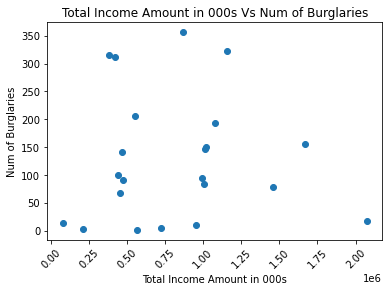

In [46]:
plt.scatter(final_df["Total Income Amount in 000s"],final_df["Num of Burglaries"])
plt.title("Total Income Amount in 000s Vs Num of Burglaries")
plt.xlabel("Total Income Amount in 000s")
plt.ylabel("Num of Burglaries")
plt.xticks(rotation=45)
plt.show()

In [35]:
# Calculate the correlation coefficient and linear regression model 
x_axis = final_df["Total Income Amount in 000s"]
y_axis = final_df["Num of Burglaries"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {(correlation[0])}")

The correlation between both factors is -0.004362459593904175


Pvalue=0.9846278272574852


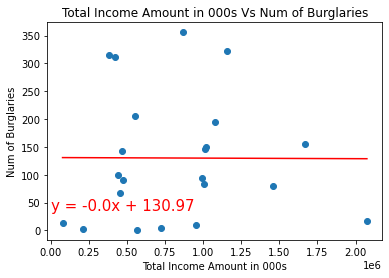

In [47]:
# linear regression model
x_axis = final_df["Total Income Amount in 000s"]
y_axis = final_df["Num of Burglaries"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Total Income Amount in 000s Vs Num of Burglaries")
plt.xlabel('Total Income Amount in 000s')
plt.ylabel('Num of Burglaries')
print(f"Pvalue={pvalue}")
plt.show()

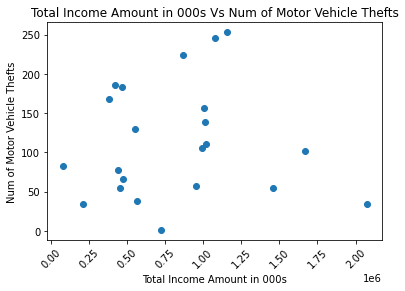

In [39]:
plt.scatter(final_df["Total Income Amount in 000s"],final_df["Num of Motor Vehicle Thefts"])
plt.title("Total Income Amount in 000s Vs Num of Motor Vehicle Thefts")
plt.xlabel("Total Income Amount in 000s")
plt.ylabel("Num of Motor Vehicle Thefts")
plt.xticks(rotation=45)
plt.show()

In [41]:
# Calculate the correlation coefficient and linear regression model 
x_axis = final_df["Total Income Amount in 000s"]
y_axis = final_df["Num of Motor Vehicle Thefts"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],5)}")

The correlation between both factors is 0.0204


Pvalue=0.9281959307099008


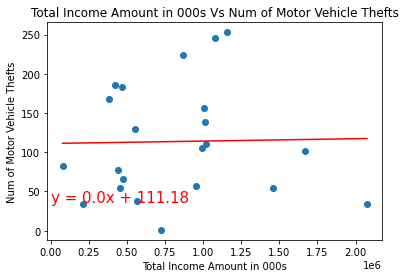

In [42]:
# linear regression model
x_axis = final_df["Total Income Amount in 000s"]
y_axis = final_df["Num of Motor Vehicle Thefts"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Total Income Amount in 000s Vs Num of Motor Vehicle Thefts")
plt.xlabel('Total Income Amount in 000s')
plt.ylabel('Num of Motor Vehicle Thefts')
print(f"Pvalue={pvalue}")
plt.show()

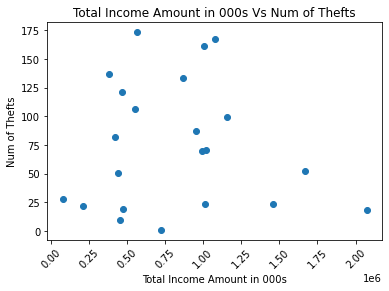

In [43]:
plt.scatter(final_df["Total Income Amount in 000s"],final_df["Num of Thefts"])
plt.title("Total Income Amount in 000s Vs Num of Thefts")
plt.xlabel("Total Income Amount in 000s")
plt.ylabel("Num of Thefts")
plt.xticks(rotation=45)
plt.show()

In [44]:
# Calculate the correlation coefficient and linear regression model 
x_axis = final_df["Total Income Amount in 000s"]
y_axis = final_df["Num of Thefts"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],5)}")

The correlation between both factors is -0.06229


pvalue=0.7830165337100516


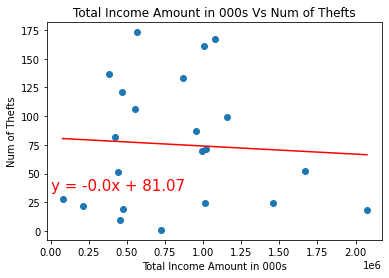

In [45]:
# linear regression model
x_axis = final_df["Total Income Amount in 000s"]
y_axis = final_df["Num of Thefts"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
print(f"pvalue={pvalue}")
plt.title("Total Income Amount in 000s Vs Num of Thefts")
plt.xlabel('Total Income Amount in 000s')
plt.ylabel('Num of Thefts')
plt.show()